In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from copy import copy
import matplotlib as mpl

In [2]:
initial_season = 2010
all_seasons = np.arange(initial_season, 2023)
columns_df = pd.read_csv(f'../../../../Workspace/BiathlonAzzurroWrapper/data/shooting_data/women/\
shooting_{initial_season}_{initial_season + 1}.txt', sep = '\t').columns

In [3]:
all_seasons = np.arange(initial_season, 2023)
final_df = pd.DataFrame(columns = columns_df)
for season in all_seasons:
    df = pd.read_csv(f'../../../../Workspace/BiathlonAzzurroWrapper/data/shooting_data/women/\
shooting_{season}_{season + 1}.txt', sep = '\t')
    df.insert(0, 'Season', f'{season}_{season + 1}')
    df.insert(0, 'fullName', df['Given Name'] + ' ' + df['Family\xa0Name'])
    final_df = pd.concat([final_df, df], axis = 0)

In [4]:
final_df.head()

,No,Family Name,Given Name,Nation,Races,World Cup\nRank,Prone\nhits,Prone\nshots,Prone\nhit rate\n(in %),Standing\nhits,Standing\nshots,Standing\nhit rate\n(in %),Total\nhits,Total\nshots,Total\nhit rate\n(in %),back from\naverage\n(in %),back from\nmedian\n(in %),Z-score,fullName,Season
0,1,Johanidesova,Lea,CZE,2,NaN,10,10,100.00,9,10,90.00,19,20,95.00,-23.52,-21.43,-1.77,Lea Johanidesova,2010_2011
1,2,Khvostenko,Oksana,UKR,9,42.0,64,70,91.43,63,70,90.00,127,140,90.71,-10.31,-9.91,-1.35,Oksana Khvostenko,2010_2011
2,3,Sloof,Chardine,NED,1,NaN,4,5,80.00,5,5,100.00,9,10,90.00,-8.42,0.00,-1.28,Chardine Sloof,2010_2011
3,4,Tokareva,Anastasia,RUS,2,NaN,4,5,80.00,5,5,100.00,9,10,90.00,-16.65,-12.50,-1.28,Anastasia Tokareva,2010_2011
4,5,Jonsson,Jenny,SWE,14,49.0,100,110,90.91,98,110,89.09,198,220,90.00,-14.87,-13.14,-1.28,Jenny Jonsson,2010_2011


In [5]:
finalDf22_23 = final_df[np.logical_or(np.array(final_df['Season'] == '2022_2023' ), np.array(final_df['Season'] == '2021_2022' ))]

In [6]:
athletes = np.array(finalDf22_23.fullName)

In [7]:
final_df_filtered = final_df[final_df['fullName'].isin(athletes)]

In [8]:
shots_df = final_df_filtered[['fullName', 'Total\nshots']].groupby('fullName').sum().sort_values('Total\nshots', ascending = False)
shots_meaningul_statistics = shots_df[shots_df['Total\nshots'] > 200] 
shots_meaningul_statistics

,Total\nshots
fullName,
Anais Bescond,4120
Dorothea Wierer,4100
Franziska Hildebrand,3370
Fuyuko Tachizaki,3240
Lisa Theresa Hauser,3230
...,...
Alla Ghilenko,250
Anastasia Tolmacheva,240
Karoline Erdal,230


In [9]:
txt_files = glob.glob('../../data/michelaPonza0/*.txt')

In [10]:
names_final = list(shots_meaningul_statistics.index[1:]) # Keeping out Anais Bescond (retired)
names_final = list(map(lambda x: x.replace(' ', '_'), names_final))

In [11]:
tmp = pd.read_csv('../../data/michelaPonza0/michelaPonza.txt', sep = '\t')
#np.sum(tmp['Total\nhit rate\n(in %)'] == 100.0)
tmp = tmp[tmp['Level'] == 'World']
tmp['year'] = list(map(lambda x: x.split('-')[0] if type(x) == str else '', list(tmp['Date'])))

#np.nanmean(tmp[tmp['Dis'] == 'SP']['Prone\nhit rate\n(in %)'])


In [12]:
len(tmp['year'].unique())

17

In [13]:
def relu(x):
    return np.maximum(0, x)

formats = ['SP', 'IN', 'PU', 'MS']

In [14]:
dict_simulation = {}
for name in list(map(lambda x: x.split('/')[-1][:-4], txt_files)):
    dict_simulation[name] = {}
    df = pd.read_csv(f'../../data/michelaPonza0/{name}.txt', sep = '\t')
    mean = list(tmp['Total\nhit rate\n(in %)'])[-1]
    df = df[df['Level'] == 'World']
    df['year'] = list(map(lambda x: x.split('-')[0] if type(x) == str else '', list(df['Date'])))
    dict_simulation[name]['year_to_simulate'] = relu(17 - len(df['year'].unique()))
    dict_simulation[name]['zeros'] = len(df[df['Total\nhit rate\n(in %)'] == 100.0])
    for format_ in formats:
        if np.nanmean(df[df['Dis'] == format_]['Prone\nhit rate\n(in %)']) > 0:
            dict_simulation[name][f'mean_prone_{format_}'] = np.nanmean(df[df['Dis'] == format_]['Prone\nhit rate\n(in %)'])
        else:
            dict_simulation[name][f'mean_prone_{format_}'] = mean
        if np.nanmean(df[df['Dis'] == format_]['Standing\nhit rate\n(in %)']) > 0:
            dict_simulation[name][f'mean_stand_{format_}'] = np.nanmean(df[df['Dis'] == format_]['Standing\nhit rate\n(in %)'])
        else:
            dict_simulation[name][f'mean_stand_{format_}'] = mean

/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_1189/1799341816.py:11: RuntimeWarning: Mean of empty slice
  if np.nanmean(df[df['Dis'] == format_]['Prone\nhit rate\n(in %)']) > 0:
/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_1189/1799341816.py:15: RuntimeWarning: Mean of empty slice
  if np.nanmean(df[df['Dis'] == format_]['Standing\nhit rate\n(in %)']) > 0:
/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_1189/1799341816.py:11: RuntimeWarning: Mean of empty slice
  if np.nanmean(df[df['Dis'] == format_]['Prone\nhit rate\n(in %)']) > 0:
/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_1189/1799341816.py:15: RuntimeWarning: Mean of empty slice
  if np.nanmean(df[df['Dis'] == format_]['Standing\nhit rate\n(in %)']) > 0:
/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_1189/1799341816.py:11: RuntimeWarning: Mean of empty slice
  if np.nanmean(df[df['Dis'] == format_]['Prone\nhit rate\n(in %)']) > 0:
/var/folders/92/pt64shtn3fx70tf0m4

In [15]:
formats_distribution = ['IN', 'SP', 'PU', 'SP', 'PU', 'SP', 'PU', 'MS', 'SP', 'PU', 'IN', 'MS', 'SP', 'PU', 'SP',\
     'PU', 'IN', 'MS', 'SP', 'PU', 'MS']

In [16]:
formats_distribution.count('SP') / len(formats_distribution)

0.3333333333333333

In [17]:
dict_simulation

{'Anais_Chevalier-Bouchet': {'year_to_simulate': 6,
  'zeros': 14,
  'mean_prone_SP': 84.0,
  'mean_stand_SP': 84.61538461538461,
  'mean_prone_IN': 91.11111111111111,
  'mean_stand_IN': 82.22222222222223,
  'mean_prone_PU': 87.8,
  'mean_stand_PU': 84.4,
  'mean_prone_MS': 80.8,
  'mean_stand_MS': 82.8},
 'Olena_Bilosiuk': {'year_to_simulate': 0,
  'zeros': 24,
  'mean_prone_SP': 85.21739130434783,
  'mean_stand_SP': 84.34782608695652,
  'mean_prone_IN': 91.25,
  'mean_stand_IN': 85.9375,
  'mean_prone_PU': 91.88679245283019,
  'mean_stand_PU': 83.9622641509434,
  'mean_prone_MS': 87.58620689655173,
  'mean_stand_MS': 85.86206896551724},
 'Vita_Semerenko': {'year_to_simulate': 3,
  'zeros': 26,
  'mean_prone_SP': 88.93617021276596,
  'mean_stand_SP': 81.06382978723404,
  'mean_prone_IN': 89.6875,
  'mean_stand_IN': 83.75,
  'mean_prone_PU': 87.58620689655173,
  'mean_stand_PU': 80.6896551724138,
  'mean_prone_MS': 89.39393939393939,
  'mean_stand_MS': 83.03030303030303},
 'Alla_Ghilen

In [18]:
formats_per_year = {}
for format_ in formats:
    formats_per_year[format_] = formats_distribution.count(format_)
shots_per_format = {'SP': 10, 'IN': 20, 'PU': 20, 'MS': 20}

In [22]:
(43) / 11

3.909090909090909

In [ ]:
zeros_final = {}
num_iter = 10000

for i, name in enumerate(list(dict_simulation.keys())):
    zeros_final[name] = []
    for _ in range(num_iter):
        shots_simulation = []
        for format_ in formats:
            total_format_to_simulate = dict_simulation[name]['year_to_simulate'] * formats_per_year[format_]
            shots_simulation += [np.concatenate([np.random.choice([0, 1], size = int(shots_per_format[format_]/2),\
                p = [(1 - dict_simulation[name][f'mean_prone_{format_}'] / 100),\
                    dict_simulation[name][f'mean_prone_{format_}'] / 100]),\
                        np.random.choice([0, 1], size = int(shots_per_format[format_]/2),\
                p = [(1 - dict_simulation[name][f'mean_stand_{format_}'] / 100),\
                        dict_simulation[name][f'mean_stand_{format_}'] / 100])]) for _ in range(total_format_to_simulate)]
        
        zeros_sim = np.sum(list(map(lambda x: np.all(x == 1), shots_simulation)))
        zeros_sim = int(zeros_sim)
    
        zeros_final[name] += [zeros_sim +  dict_simulation[name]['zeros']]
    
            #print(shots_simulations,)

In [ ]:
pd.DataFrame(zeros_final).mean(axis = 0).sort_values(ascending = False)[:12]

Yuliia_Dzhima        156.7078
Vanessa_Hinz         101.5804
Vanessa_Voigt        101.5624
Lou_Jeanmonnot        92.3995
Lotte_Lie             80.3672
Fanqi_Meng            66.1847
Maria_Zdravkova       62.9294
Amy_Baserga           60.9474
Lyudmila_Akhatova     57.2317
Natalia_Ushkina       54.8435
Emma_Nilsson          54.2543
michelaPonza          54.0000
dtype: float64

/var/folders/92/pt64shtn3fx70tf0m4ng91240000gn/T/ipykernel_743/1902252286.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(zeros_athletes, rotation = 8)


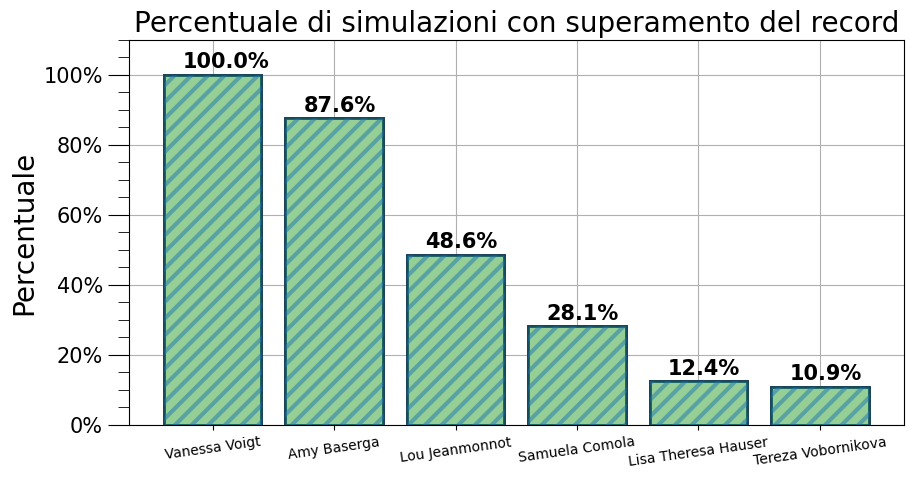

In [126]:
zeros_percent = ((pd.DataFrame(zeros_final) >= 54).sum(axis = 0)/10000).sort_values(ascending = False)[:20]
zeros_percent = ((pd.DataFrame(zeros_final) >= 54).sum(axis = 0)/10000).sort_values(ascending = False)[:20]
zeros_percent['Lou_Jeanmonnot'] = 0.4859
zeros_athletes = ['Vanessa Voigt', 'Amy Baserga', 'Lou Jeanmonnot', 'Samuela Comola', 'Lisa Theresa Hauser',\
    'Tereza Vobornikova']
athletes_percent = []
for athlete in zeros_athletes:
    athletes_percent += [zeros_percent[athlete.replace(' ', '_')]]
    
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(zeros_athletes, list(map(lambda x: float(x) * 100, athletes_percent)), alpha = 0.5, linewidth = 2, zorder = 3,\
    color = 'C2')
ax.bar(zeros_athletes, list(map(lambda x: float(x) * 100, athletes_percent)), linewidth = 2, color = 'white',\
     edgecolor = 'black', zorder = 2)
ax.grid(zorder = 1)
ax.set_xticklabels(zeros_athletes, rotation = 8)
ax.tick_params(axis='y', which='major', labelsize=15, length=15)
ax.tick_params(axis='y', which='minor', labelsize=15, length=8)
ax.tick_params(axis='x', which='minor', labelsize=15, length=0)
ax.set_title('Percentuale di simulazioni con superamento del record', fontsize = 20)
ax.set_ylabel('Percentuale', fontsize = 20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylim(0, 110)
for i, v in enumerate(athletes_percent):
    ax.text(i - 0.25, v * 100 + 2, str(round(v * 100, 1)) + '%', color='black', fontweight='bold', fontsize = 15)
for bar in ax.containers[0]:
    bar.set_hatch('//')
    bar.set_edgecolor('C0')
    rect = copy(bar)
    mpl.rcParams['hatch.linewidth'] = 3

ax.minorticks_on()
fig.savefig('../../../../Desktop/paperPlots/michelaPonzaRecord.svg', facecolor = 'white', dpi = 300, bbox_inches = 'tight')


In [67]:
zeros_percent = ((pd.DataFrame(zeros_final) >= 54).sum(axis = 0)/10000).sort_values(ascending = False)[:20]
zeros_percent['Lou_Jeanmonnot'] = 0.4859
zeros_percent

michelaPonza            1.0000
Yuliia_Dzhima           1.0000
Vanessa_Hinz            1.0000
Lotte_Lie               1.0000
Vanessa_Voigt           1.0000
Lou_Jeanmonnot          0.4859
Fanqi_Meng              0.9743
Maria_Zdravkova         0.9340
Amy_Baserga             0.8756
Lyudmila_Akhatova       0.7232
Natalia_Ushkina         0.5849
Emma_Nilsson            0.5516
Iryna_Petrenko          0.4326
Darya_Blashko           0.3180
Samuela_Comola          0.2812
Suvi_Minkkinen          0.1888
Lisa_Theresa_Hauser     0.1243
Tereza_Vobornikova      0.1086
Anastasia_Tolmacheva    0.0871
Eunjung_Ko              0.0800
dtype: float64

In [40]:
dict_simulation['Lou_Jeanmonnot']

{'year_to_simulate': 14,
 'zeros': 6,
 'mean_prone_SP': 95.0,
 'mean_stand_SP': 87.5,
 'mean_prone_IN': 100.0,
 'mean_stand_IN': 95.0,
 'mean_prone_PU': 92.5,
 'mean_stand_PU': 90.0,
 'mean_prone_MS': 90.0,
 'mean_stand_MS': 90.0}

In [57]:
dict_simulation['Lou_Jeanmonnot']['mean_prone_IN'] = 95.
all_zeros_Lou = []
for _ in range(num_iter):
    shots_simulation_Lou = []
    for format_ in formats:
        total_format_to_simulate = dict_simulation['Lou_Jeanmonnot']['year_to_simulate'] * formats_per_year[format_]
        shots_simulation_Lou += [np.concatenate([np.random.choice([0, 1], size = int(shots_per_format[format_]/2),\
            p = [(1 - dict_simulation[name][f'mean_prone_{format_}'] / 100),\
                dict_simulation[name][f'mean_prone_{format_}'] / 100]),\
                    np.random.choice([0, 1], size = int(shots_per_format[format_]/2),\
            p = [(1 - dict_simulation[name][f'mean_stand_{format_}'] / 100),\
                    dict_simulation[name][f'mean_stand_{format_}'] / 100])]) for _ in range(total_format_to_simulate)]

    zeros_Lou = np.sum(list(map(lambda x: np.all(x == 1), shots_simulation_Lou)))
    zeros_Lou = int(zeros_Lou)     
    
    all_zeros_Lou += [zeros_Lou]


In [62]:
np.sum(list(map(lambda x: x>= 54, all_zeros_Lou )))/10000

0.4859

In [15]:
dict_simulation

{'Anais_Chevalier-Bouchet': {'year_to_simulate': 6,
  'zeros': 14,
  'mean_prone_SP': 84.0,
  'mean_stand_SP': 84.61538461538461,
  'mean_prone_IN': 91.11111111111111,
  'mean_stand_IN': 82.22222222222223,
  'mean_prone_PU': 87.8,
  'mean_stand_PU': 84.4,
  'mean_prone_MS': 80.8,
  'mean_stand_MS': 82.8},
 'Olena_Bilosiuk': {'year_to_simulate': 0,
  'zeros': 24,
  'mean_prone_SP': 85.21739130434783,
  'mean_stand_SP': 84.34782608695652,
  'mean_prone_IN': 91.25,
  'mean_stand_IN': 85.9375,
  'mean_prone_PU': 91.88679245283019,
  'mean_stand_PU': 83.9622641509434,
  'mean_prone_MS': 87.58620689655173,
  'mean_stand_MS': 85.86206896551724},
 'Vita_Semerenko': {'year_to_simulate': 3,
  'zeros': 26,
  'mean_prone_SP': 88.93617021276596,
  'mean_stand_SP': 81.06382978723404,
  'mean_prone_IN': 89.6875,
  'mean_stand_IN': 83.75,
  'mean_prone_PU': 87.58620689655173,
  'mean_stand_PU': 80.6896551724138,
  'mean_prone_MS': 89.39393939393939,
  'mean_stand_MS': 83.03030303030303},
 'Alla_Ghilen